# Numerical Interpolation and Curve Fitting
_By Dhruv Jain_

### **Objective: Use given data points to determine a value of an intermediate point**

In [5]:
# Key libraries: Numpy(for mathematical procedures) and matplotlib(to create plots)
import numpy as np
import matplotlib.pyplot as plt 
import copy

## Lagrange Interpolating Polynomial Function

In [6]:
# Lagrange Interpolating Polynomial Function:
def lagrange_interp(xi,fi,x_interp):
    """Dhruv Jain, 18 Oct, 2021
    Obj: Use Lagrange Form of the Interpolating Polynomial to find f(x_i) for given x_i using given (x,y) data points  
    Args:
        xi: (n x 1) vector, x-coordinates of the given data set
        fi: (n x 1) vector, y-coordinates of the given data set
        x_interp: (n_interp x 1) vector, given x-coordinate points for which we interpolate and finds its y-coordinates
    Output:
        f_interp: (n_iterp x n) vector, interpolated y-ccordinates of x_interp using Lagrange form of Interpolating Polynomial
    """
    n = len(xi)
    coeff = np.zeros(n)
    coeff = copy.copy(fi) # coeff contains all the f(xi) terms 

    # Step 1: Create fi/denominator(Ln,i); independent of the points we want to interploate for
    for i in range(n):
        for j in range(n):
            if i==j:
                continue
            coeff[i] = coeff[i]/(xi[i]-xi[j])
    
    # Step 2: Multiply the numerator(Ln,i); dependent on x_interp, thus needs to be called len(x_interp) times
    def lag_interp_num_coeff(xval):
        """Dhruv Jain, 18 Oct, 2021, MSAAE Purdue
        Obj: Calculate and multiply the numerators of Ln,i based of x_interp[i] value to get f_interp[i]
        Args:
            xval: float, value for which the interpolated value is calculated
        Output:
            sum: float, interpolated y-ccordinates of x_interp using Lagrange form of Interpolating Polynomial
        """
        sum = 0.0;
        for i in range(n):
            temp_c = coeff[i]
            for j in range(n):
                if i==j:
                    continue
                temp_c = temp_c*(xval-xi[j])
            sum = sum + temp_c
        return sum
    
    # Initialize and calculate y-coord for each x_interp element
    f_interp = np.zeros(len(x_interp))
    for i in range(len(x_interp)):
        f_interp[i] = lag_interp_num_coeff(x_interp[i])   
    
    return f_interp

## Newton Interpolating Polynomial Function

In [7]:
# Newton Interpolating Polynomial Function: 
def newton_interp(xi,fi,x_interp):
    """Dhruv Jain, 18 Oct, 2021
    Obj: Use Newton Form of the Interpolating Polynomial to find f(x_i) for given x_i using given (x,y) data points  
    Args:
        xi: (n x 1) vector, x-coordinates of the given data set
        fi: (n x 1) vector, y-coordinates of the given data set
        x_interp: (n_interp x 1) vector, given x-coordinate points for which we interpolate and finds its y-coordinates
    Output:
        f_interp: (n_iterp x n) vector, interpolated y-ccordinates of x_interp using Lagrange form of Interpolating Polynomial
        coeff: (n-1 x 1) vector, coefficients of Newton form of Interpolating Polynomial: f[x0], f[x0,x1], f[x0,x1,x2].......,f[x0,x1,....,xn]
    """
    n = len(xi)
    coeff = np.zeros(n)
    coeff[0] = copy.copy(fi[0]) # coeff contains all the f[x0], f[x0,x1]....f[x0,x1,.....,xn] terms 
    temp = copy.copy(fi)
    
    # Step 1: Compute f[x0], f[x0,x1] ... f[x0,x1,....xn] coeffecient values; independent of the points we want to interploate for
    for i in range(1,n):
        for j in range(n-i):
            temp[j] = (temp[j+1]-temp[j])/(xi[j+i]-xi[j])
        coeff[i] = temp[0]
    
    # Step 2: Multiply the numerator (x-x0)(x-x1)...(x-xn); dependent on x_interp, thus needs to be called len(x_interp) times
    def newton_interp_num_coeff(xval):
        """Dhruv Jain, 18 Oct, 2021, MSAAE Purdue
        Obj: Calculate and multiply (x-x0)(x-x1)...(x-xn) based on x_interp[i] value to get f_interp[i]
        Args:
            xval: float, value for which the interpolated value is calculated
        Output:
            sum: (n_iterp x n) vector, interpolated y-ccordinates of x_interp using Lagrange form of Interpolating Polynomial
        """
        sum = coeff[0]
        for i in range(1,n):
            temp = coeff[i]*(xval-xi[i-1])
            for j in range(1,i):
                temp = temp*(xval-xi[i-j-1])
            sum = sum + temp
        return sum
    
    # Initialize and calculate y-coord for each x_interp element
    f_interp = np.zeros(len(x_interp))
    for i in range(len(x_interp)):
        f_interp[i] = newton_interp_num_coeff(x_interp[i])   
    
    return f_interp, coeff

## Example

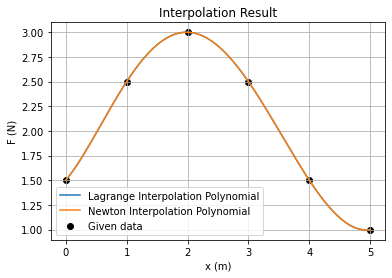

In [16]:
# Sample data
xdat = np.array([0,1,2,3,4,5])
fdat = np.array([1.5,2.5,3,2.5,1.5,1])
x_cont_dat = np.linspace(min(xdat),max(xdat),1000)

# Calculate interpolating polynomial 
f_cont_dat_lagrange =lagrange_interp(xdat, fdat, x_cont_dat)
f_cont_dat_newton, coeff = newton_interp(xdat, fdat, x_cont_dat)

# Plot
plt.figure(1)
plt.title('Interpolation Result')
plt.scatter(xdat,fdat,color = 'black',label='Given data')
plt.plot(x_cont_dat,f_cont_dat_lagrange,label='Lagrange Interpolation Polynomial')
plt.plot(x_cont_dat,f_cont_dat_newton,label='Newton Interpolation Polynomial')
plt.ylabel('F (N)')
plt.xlabel('x (m)')
plt.grid()
plt.legend()
